In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the path to your dataset directory
dataset_path = '/content/drive/My Drive/IOT-Firmware-dataset/imagery'

# Define the image dimensions you want to resize to
img_width, img_height = 224, 224

# Load and preprocess the images and labels
images = []
labels = []

class_names = ['benignware', 'gray', 'hackware', 'malware']

In [ ]:
for class_index, class_name in enumerate(class_names):
    class_dir = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
        images.append(image)
        labels.append(class_index)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
print(images)

In [ ]:
# Split the dataset into training, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)
val_images, test_images, val_labels, test_labels = train_test_split(
    test_images, test_labels, test_size=0.5, random_state=42
)

In [ ]:
# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# One-hot encode the labels
num_classes = len(class_names)
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Flatten(input_shape=(img_width, img_height, 3)),  # Flattens the 2D image data into a 1D vector
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),  # Fully connected layer with 64 neurons and ReLU activation
    Dropout(0.5),  # Dropout layer
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 19,276,228
Trainable params: 19,276,228
No

In [ ]:
# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/10
113/113 [==============================] - 49s 420ms/step - loss: 5.2086 - accuracy: 0.6614 - val_loss: 0.7151 - val_accuracy: 0.8125
Epoch 2/10
113/113 [==============================] - 44s 392ms/step - loss: 1.2277 - accuracy: 0.7718 - val_loss: 0.3260 - val_accuracy: 0.8125
Epoch 3/10
113/113 [==============================] - 42s 369ms/step - loss: 0.5480 - accuracy: 0.7721 - val_loss: 0.2922 - val_accuracy: 0.8125
Epoch 4/10
113/113 [==============================] - 42s 374ms/step - loss: 0.6008 - accuracy: 0.7417 - val_loss: 0.3946 - val_accuracy: 0.8147
Epoch 5/10
113/113 [==============================] - 42s 368ms/step - loss: 0.6031 - accuracy: 0.7409 - val_loss: 0.3084 - val_accuracy: 0.8058
Epoch 6/10
113/113 [==============================] - 42s 367ms/step - loss: 0.5468 - accuracy: 0.7370 - val_loss: 0.2562 - val_accuracy: 0.8147
Epoch 7/10
113/113 [==============================] - 41s 358ms/step - loss: 0.5586 - accuracy: 0.7403 - val_loss: 0.2470 - val_ac

CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),  # Convolutional layer with 32 filters
    MaxPooling2D(2, 2),  # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Another convolutional layer with 64 filters
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),  # Another convolutional layer with 128 filters
    MaxPooling2D(2, 2),
    Flatten(),  # Flatten the 3D output to 1D for fully connected layers
    Dense(512, activation='relu'),  # Fully connected layer with 512 neurons and ReLU activation
    Dropout(0.5),  # Dropout layer
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/10
113/113 [==============================] - 521s 5s/step - loss: 0.3323 - accuracy: 0.8784 - val_loss: 0.0437 - val_accuracy: 0.9955
Epoch 2/10
113/113 [==============================] - 521s 5s/step - loss: 0.0494 - accuracy: 0.9819 - val_loss: 0.0202 - val_accuracy: 0.9955
Epoch 3/10
113/113 [==============================] - 518s 5s/step - loss: 0.0147 - accuracy: 0.9964 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 4/10
113/113 [==============================] - 504s 4s/step - loss: 0.0101 - accuracy: 0.9961 - val_loss: 0.0114 - val_accuracy: 0.9955
Epoch 5/10
113/113 [==============================] - 512s 5s/step - loss: 0.3485 - accuracy: 0.9816 - val_loss: 0.0252 - val_accuracy: 0.9888
Epoch 6/10
113/113 [==============================] - 497s 4s/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/10
113/113 [==============================] - 495s 4s/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0030 - val_accuracy: 0.9978

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

15/15 [==============================] - 18s 1s/step - loss: 0.0304 - accuracy: 0.9866
Test Loss: 0.0304
Test Accuracy: 0.9866


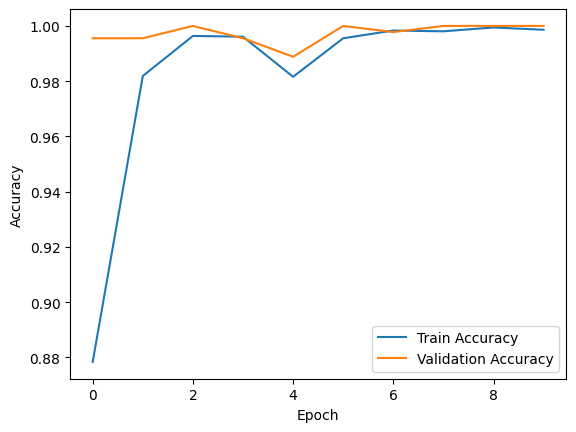

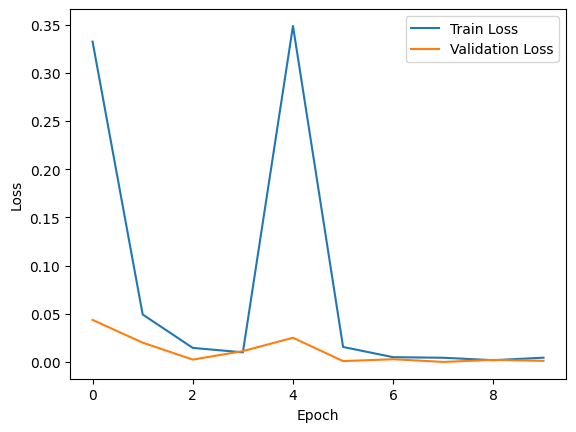

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()